In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras import backend
num_classes = 10
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = x_train.shape[1:]
# reshape to be [samples][width][height][channels]
if backend.image_data_format() == 'channels_first':
	x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
	x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
	input_shape = (1, img_rows, img_cols)
else:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
	x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
	input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.
C:\Users\USER\Anaconda3\envs\tf14_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\envs\tf14_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\envs\tf14_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USER\Anaconda3\envs\tf14_env\lib

In [ ]:
Conv2D.

In [9]:


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
               activation='relu',
               input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Epoch 1/5
60000/60000 [==============================] - 49s 814us/step - loss: 0.5675 - acc: 0.8225
Epoch 2/5
60000/60000 [==============================] - 49s 817us/step - loss: 0.2901 - acc: 0.9123
Epoch 3/5
60000/60000 [==============================] - 49s 820us/step - loss: 0.2288 - acc: 0.9327
Epoch 4/5
60000/60000 [==============================] - 50s 828us/step - loss: 0.1820 - acc: 0.9466
Epoch 5/5
10000/10000 [==============================] - 1s 140us/step
test_loss_and_accuracy : [0.06903782871300354, 0.9788]


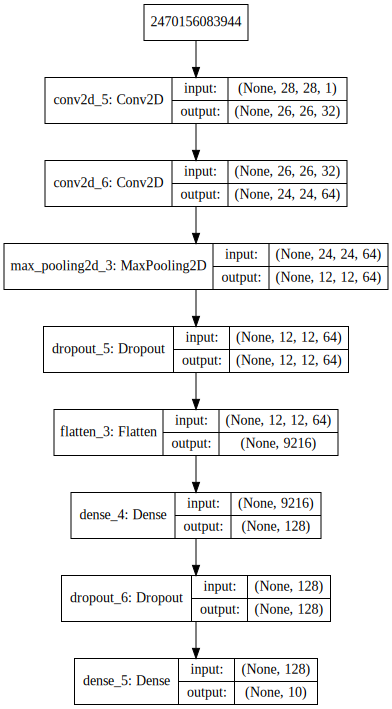

In [10]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

test_loss_and_accuracy = model.evaluate(x_test, y_test, batch_size=32)

print('test_loss_and_accuracy : ' + str(test_loss_and_accuracy))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend

(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = x_train.shape[1:]

if backend.image_data_format() == 'channels_first':
	x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
	x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
	input_shape = (1, img_rows, img_cols)
else:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
	x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
	input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
               activation='relu',
               input_shape=input_shape))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, batch_size=32)

test_loss_and_accuracy = model.evaluate(x_test, y_test, batch_size=32)

print('test_loss_and_accuracy : ' + str(test_loss_and_accuracy))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [ ]:
from 